# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls

In [3]:
# Use this variable for testing only (replace "cities with cities2 in for loop")
#cities2 = ['dharan', 'ornskoldsvik', 'bucksport', 'lasa', 'barabai', 'vikhorevka', 'saint-gilles', 'barra do garcas', 'cermik', 'igbo ora', 'taolanaro', 'illoqqortoormiut', 'alotau', 'albany', 'sentyabrskiy', 'hamilton', 'port alfred', 'port hardy', 'hithadhoo', 'barrow','butaritari','faanui','hermanus','puerto ayora','jamestown', 'nefteyugansk']

In [4]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url. Test first by appending one city name to the end of f-string. Test get and json-ify.
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

In [5]:
# Loop through each city in cities list (randomly put in list by starter code) and append to open lists. 
# Loop generates respons and json_ifies each response

name = []
city_id = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
date = []

counter = 1

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        print(f"{city}: city number {counter} of {len(cities)} has been located.")
        counter += 1

    except (KeyError, IndexError):
        print(f"Missing data for city number {counter} of {len(cities)}.")
        counter += 1
    
    time.sleep(1)     

jamestown: city number 1 of 617 has been located.
nikolskoye: city number 2 of 617 has been located.
atuona: city number 3 of 617 has been located.
bahua: city number 4 of 617 has been located.
victoria: city number 5 of 617 has been located.
rikitea: city number 6 of 617 has been located.
ushuaia: city number 7 of 617 has been located.
quesnel: city number 8 of 617 has been located.
port elizabeth: city number 9 of 617 has been located.
opuwo: city number 10 of 617 has been located.
hobart: city number 11 of 617 has been located.
madang: city number 12 of 617 has been located.
Missing data for city number 13 of 617.
port alfred: city number 14 of 617 has been located.
hermanus: city number 15 of 617 has been located.
puerto ayora: city number 16 of 617 has been located.
kvitok: city number 17 of 617 has been located.
necochea: city number 18 of 617 has been located.
bluff: city number 19 of 617 has been located.
shingu: city number 20 of 617 has been located.
Missing data for city num

upernavik: city number 167 of 617 has been located.
Missing data for city number 168 of 617.
ranghulu: city number 169 of 617 has been located.
itape: city number 170 of 617 has been located.
mahebourg: city number 171 of 617 has been located.
ewa beach: city number 172 of 617 has been located.
kenai: city number 173 of 617 has been located.
port hardy: city number 174 of 617 has been located.
lompoc: city number 175 of 617 has been located.
bonthe: city number 176 of 617 has been located.
meadow lake: city number 177 of 617 has been located.
bredasdorp: city number 178 of 617 has been located.
port macquarie: city number 179 of 617 has been located.
khatanga: city number 180 of 617 has been located.
sisimiut: city number 181 of 617 has been located.
ribeira grande: city number 182 of 617 has been located.
besuki: city number 183 of 617 has been located.
boguchany: city number 184 of 617 has been located.
Missing data for city number 185 of 617.
comines: city number 186 of 617 has been

kuusamo: city number 329 of 617 has been located.
chepareria: city number 330 of 617 has been located.
killybegs: city number 331 of 617 has been located.
mumbwa: city number 332 of 617 has been located.
saint george: city number 333 of 617 has been located.
cayenne: city number 334 of 617 has been located.
oriximina: city number 335 of 617 has been located.
baykit: city number 336 of 617 has been located.
sept-iles: city number 337 of 617 has been located.
Missing data for city number 338 of 617.
taganak: city number 339 of 617 has been located.
Missing data for city number 340 of 617.
taoudenni: city number 341 of 617 has been located.
faya: city number 342 of 617 has been located.
irbit: city number 343 of 617 has been located.
okha: city number 344 of 617 has been located.
berdigestyakh: city number 345 of 617 has been located.
mortka: city number 346 of 617 has been located.
leningradskiy: city number 347 of 617 has been located.
christchurch: city number 348 of 617 has been locat

Missing data for city number 491 of 617.
freeport: city number 492 of 617 has been located.
rapallo: city number 493 of 617 has been located.
tsiroanomandidy: city number 494 of 617 has been located.
yumen: city number 495 of 617 has been located.
bama: city number 496 of 617 has been located.
senanga: city number 497 of 617 has been located.
karakol: city number 498 of 617 has been located.
qaqortoq: city number 499 of 617 has been located.
huarmey: city number 500 of 617 has been located.
dehui: city number 501 of 617 has been located.
rorvik: city number 502 of 617 has been located.
rio grande: city number 503 of 617 has been located.
ornskoldsvik: city number 504 of 617 has been located.
mayo: city number 505 of 617 has been located.
ust-ilimsk: city number 506 of 617 has been located.
havre-saint-pierre: city number 507 of 617 has been located.
moerai: city number 508 of 617 has been located.
arrifes: city number 509 of 617 has been located.
vila velha: city number 510 of 617 has 

In [6]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame({"City":name, "Latitude":lat, "Longitude":lon, "Max Temperature (F)":temperature, "Humidity (%)":humidity, "Cloud Cover (%)":cloudiness, "Wind Speed (mph)":windspeed, "Date":date})
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Jamestown,42.0970,-79.2353,23.00,58,90,10.36,1612811533
1,Nikolskoye,59.7035,30.7861,1.00,85,0,2.24,1612811284
2,Atuona,-9.8000,-139.0333,79.88,75,65,21.54,1612811535
3,Bahua,25.8500,80.6333,56.48,58,0,4.18,1612811536
4,Hong Kong,22.2855,114.1577,66.00,78,100,24.72,1612811351


In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Jamestown,42.0970,-79.2353,23.00,58,90,10.36,1612811533
1,Nikolskoye,59.7035,30.7861,1.00,85,0,2.24,1612811284
2,Atuona,-9.8000,-139.0333,79.88,75,65,21.54,1612811535
3,Bahua,25.8500,80.6333,56.48,58,0,4.18,1612811536
4,Hong Kong,22.2855,114.1577,66.00,78,100,24.72,1612811351


In [8]:
# Export the cleaned data dataframe to a csv for later use.
clean_city_data_df.to_csv("../Resources/city_data.csv", header=True)

## Latitude vs. Temperature Plot

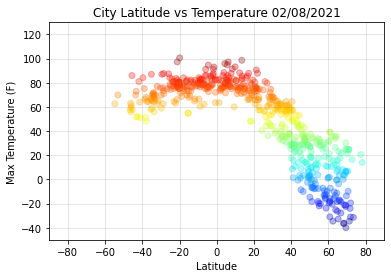

Add a sentence.


In [9]:
# To convert the access date: https://www.tutorialspoint.com/python/time_strftime.htm
# https://medium.com/better-programming/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c
# https://matplotlib.org/examples/color/colormaps_reference.html

plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.3, c = clean_city_data_df["Max Temperature (F)"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("../Images/LatTemp.png")

plt.show()

print(f"Add a sentence.")

##  Latitude vs. Humidity Plot

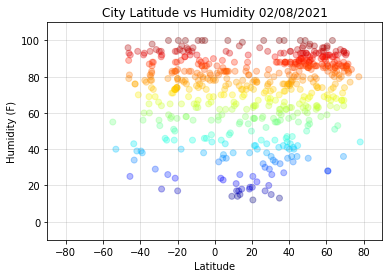

Add a sentence.


In [10]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.3, c = clean_city_data_df["Humidity (%)"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("../Images/LatHum.png")

plt.show()

print(f"Add a sentence.")

## Latitude vs. Cloudiness Plot

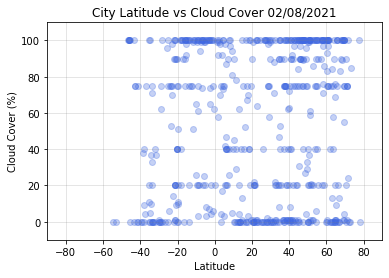

Add a sentence.


In [11]:
plt.title(f'City Latitude vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
plt.savefig("../Images/LatCloud.png")

plt.show()

print(f"Add a sentence.")

## Latitude vs. Wind Speed Plot

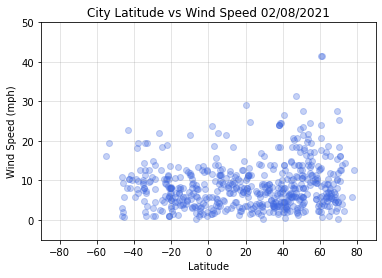

Add a sentence.


In [12]:
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-5, 50)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
plt.savefig("../Images/LatWind.png")

plt.show()

print(f"Add a sentence.")

## Linear Regression

In [13]:
# Find the cities in the northern hemisphere
north_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0]
north_cities.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Jamestown,42.0970,-79.2353,23.00,58,90,10.36,1612811533
1,Nikolskoye,59.7035,30.7861,1.00,85,0,2.24,1612811284
3,Bahua,25.8500,80.6333,56.48,58,0,4.18,1612811536
4,Hong Kong,22.2855,114.1577,66.00,78,100,24.72,1612811351
7,Quesnel,52.9999,-122.5029,-7.60,77,1,10.36,1612811295


In [14]:
# Find the cities in the southern hemisphere
south_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0]
south_cities.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
2,Atuona,-9.8000,-139.0333,79.88,75,65,21.54,1612811535
5,Rikitea,-23.1203,-134.9692,77.52,71,70,9.28,1612811280
6,Ushuaia,-54.8000,-68.3000,62.60,55,0,16.11,1612811274
8,Port Elizabeth,-33.9180,25.5701,68.00,83,0,12.66,1612811341
9,Opuwo,-18.0607,13.8400,75.29,40,100,10.65,1612811543


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

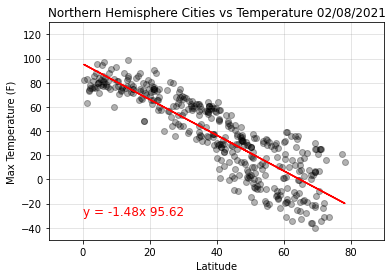

The r-squared value is 0.7566968601463246.


In [23]:
# Set the x and y limits for each graph to include min and max latitude because it is unknow what cities will be
# determined in the random sampling.
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NTemp.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

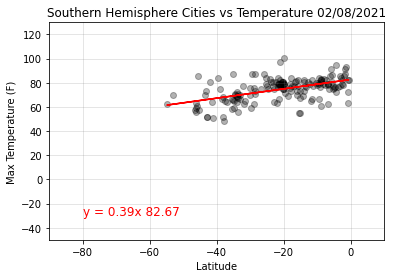

The r value is 0.5266320583824429.
The r-squared value is 0.27734132491612873.


In [24]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/STemp.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

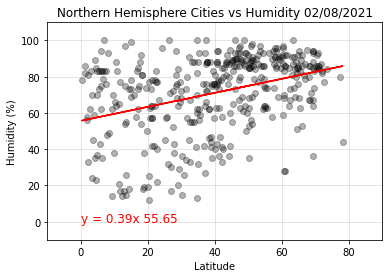

The r value is 0.36239497263618575.
The r-squared value is 0.13133011619198182.


In [25]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,0), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NHum.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

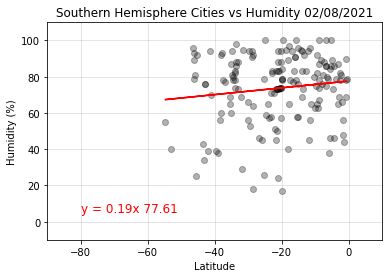

The r value is 0.1312681084064504.
The r-squared value is 0.017231316284607612.


In [26]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/SHum.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

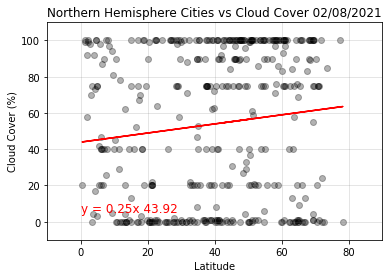

The r value is 0.12103975088157344.
The r-squared value is 0.01465062129347336.


In [27]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NCloud.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

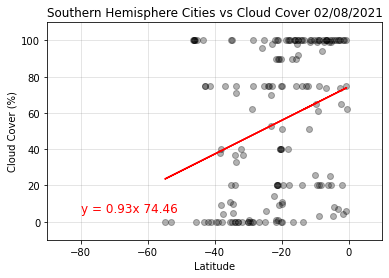

The r value is 0.2957047601304306.
The r-squared value is 0.08744130516379552.


In [28]:
x_values = south_cities["Latitude"]
y_values = south_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/SCloud.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

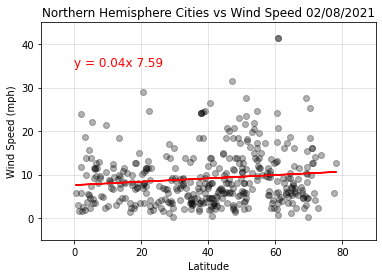

The r value is 0.12091807026980272.
The r-squared value is 0.01462117971777295.


In [29]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,35), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NWind.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

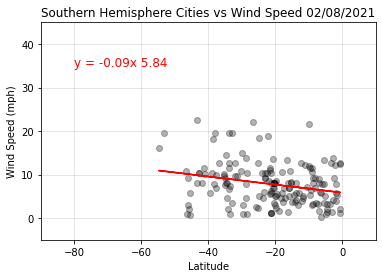

The r value is -0.2549588996476726.
The r-squared value is 0.06500404050955198.


In [30]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,35), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/SWind.png")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")